In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
path = "../input/tomato/New Plant Diseases Dataset(Augmented)"
os.listdir(path)

['valid', 'train']

In [3]:
train_path = os.path.join(path, "train")
print(os.listdir(train_path))
print("*"*100)
test_path = os.path.join(path, "valid")
print(os.listdir(test_path))

['Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite']
****************************************************************************************************
['Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite']


In [4]:
from glob import glob
folders = glob("../input/tomato/New Plant Diseases Dataset(Augmented)/train/*")
folders

['../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite']

Text(0.5, 1.0, 'Bacterial Spot')

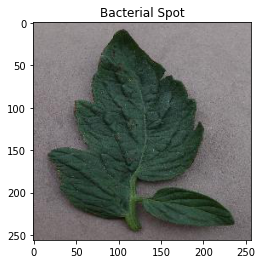

In [5]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG"))
plt.title("Bacterial Spot")

In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [7]:
#image size
SIZE = [124, 124]

In [8]:
from tensorflow.keras.applications.vgg19 import VGG19

In [9]:
vg19 = VGG19(input_shape=SIZE + [3], weights="imagenet", include_top=False)

80142336/80134624 [==============================] - 0s 0us/step


In [10]:
for layer in vg19.layers:
    layer.trainable = False

In [11]:
x = Flatten()(vg19.output)

In [12]:
prediction = Dense(len(folders), activation="softmax")(x)

modelvg = Model(inputs=vg19.input, outputs=prediction)

In [13]:
modelvg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 124, 124, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 124, 124, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 124, 124, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 62, 62, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 62, 62, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 62, 62, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 31, 31, 128)       0     

In [14]:
modelvg.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [15]:
# Data Augmentation
train_datagen_vg19 = ImageDataGenerator(rescale=1./255)
test_datagen_vg19 = ImageDataGenerator(rescale=1./255)

In [16]:
trainning_set_vg19 = train_datagen_vg19.flow_from_directory(train_path,
                                                 target_size=(124, 124),
                                                 batch_size=16,
                                                 class_mode="categorical", shuffle=True)

Found 18345 images belonging to 10 classes.


In [17]:
testing_set_vg19 = test_datagen_vg19.flow_from_directory(test_path,
                                                 target_size=(124, 124),
                                                 batch_size=16,
                                                 class_mode="categorical", shuffle=False)

Found 4585 images belonging to 10 classes.


In [18]:
# model fit
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
r_vg19 = modelvg.fit_generator(trainning_set_vg19,
                       validation_data=testing_set_vg19,
                       epochs=100,
                       steps_per_epoch=len(trainning_set_vg19),
                       validation_steps=len(testing_set_vg19),
                       callbacks=[callback]
                       )

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
1147/1147 [==============================] - 213s 180ms/step - loss: 1.1498 - accuracy: 0.6229 - val_loss: 0.6492 - val_accuracy: 0.7736
Epoch 2/100
1147/1147 [==============================] - 53s 46ms/step - loss: 0.5431 - accuracy: 0.8191 - val_loss: 0.5934 - val_accuracy: 0.7900
Epoch 3/100
1147/1147 [==============================] - 52s 46ms/step - loss: 0.4363 - accuracy: 0.8567 - val_loss: 0.5240 - val_accuracy: 0.8196
Epoch 4/100
1147/1147 [==============================] - 52s 46ms/step - loss: 0.3668 - accuracy: 0.8766 - val_loss: 0.4565 - val_accuracy: 0.8432
Epoch 5/100
1147/1147 [==============================] - 53s 46ms/step - loss: 0.3160 - accuracy: 0.8981 - val_loss: 0.4755 - val_accuracy: 0.8340
Epoch 6/100
1147/1147 [==============================] - 53s 46ms/step - loss: 0.2908 - accuracy: 0.9068 - val_loss: 0.4969 - val_accuracy: 0.8310
Epoch 7/100
1147/1147 [==============================] - 52s 45ms/step - loss: 0.2615 - accuracy: 0.9168 - val_loss:

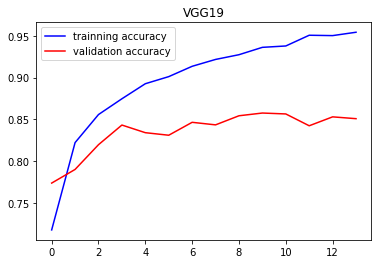

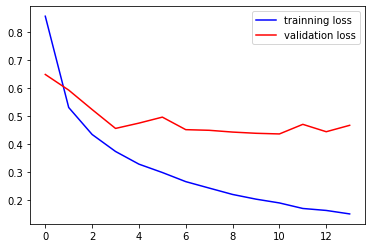

In [19]:
import matplotlib.pyplot as plt
accuracy = r_vg19.history['accuracy']
val_accuracy = r_vg19.history['val_accuracy']
loss = r_vg19.history['loss']
val_loss = r_vg19.history['val_loss']
epochs = range(len(accuracy))
plt.title("VGG19")
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [20]:
y_pred = modelvg.predict(testing_set_vg19)
y_pred

array([[9.99016285e-01, 3.76444164e-04, 4.75764027e-05, ...,
        4.81249881e-04, 3.34369921e-10, 1.44682728e-08],
       [9.99472797e-01, 4.91966610e-04, 7.98805218e-07, ...,
        2.00500310e-07, 1.13106044e-13, 1.37170959e-08],
       [9.86248195e-01, 2.77745887e-03, 4.45717189e-04, ...,
        7.73305946e-04, 1.44227454e-06, 7.21433433e-03],
       ...,
       [3.29112481e-05, 1.78097416e-05, 1.67791426e-04, ...,
        1.94598010e-06, 1.93865594e-06, 9.99577820e-01],
       [2.50892714e-03, 7.40130345e-05, 1.44580081e-05, ...,
        2.58252794e-06, 1.79174489e-08, 9.97233689e-01],
       [1.01523479e-09, 1.10621208e-04, 1.10003093e-07, ...,
        1.39616887e-07, 4.11272850e-07, 9.99011636e-01]], dtype=float32)

In [21]:
y_pred[2]

array([9.8624820e-01, 2.7774589e-03, 4.4571719e-04, 2.4462611e-06,
       1.9660685e-04, 1.1891637e-03, 1.1513234e-03, 7.7330595e-04,
       1.4422745e-06, 7.2143343e-03], dtype=float32)

In [22]:
y_pred = np.argmax(y_pred, axis=1)
y_pred


array([0, 0, 0, ..., 9, 9, 9])

In [23]:
y_pred[0]

0

In [24]:
modelvg.save("vgg_19tl.model")

In [25]:
from tensorflow import lite

In [26]:
converter = lite.TFLiteConverter.from_keras_model(modelvg)
tfmodel = converter.convert()

tfmodel_size = len(tfmodel) / 1024
print('tfmodel size = %dKBs.' % tfmodel_size)

#open('tomato.tflite', 'wb').write(tfmodel)
#modelvg.save("tomato.tflite")

tfmodel size = 78410KBs.


In [27]:
open('tomato.tflite', 'wb').write(tfmodel)

80292036

In [28]:
f = open('tomato.tflite', "wb")
f.write(tfmodel)
f.close()